In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")

print("Path to dataset files:", path)

100%|██████████| 292k/292k [00:00<00:00, 639kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4


In [4]:
import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")

print("Path to dataset files:", path)

# Use the 'path' variable to construct the correct file path
df = pd.read_csv(path + '/car data.csv') # Assuming 'car data.csv' is the actual file name
df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.value_counts()


Car_Name           Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
fortuner           2015  23.00          30.61          40000       Diesel     Dealer       Automatic     0        2
ertiga             2016  7.75           10.79          43000       Diesel     Dealer       Manual        0        2
800                2003  0.35           2.28           127000      Petrol     Individual   Manual        0        1
ertiga             2015  6.10           7.71           26000       Petrol     Dealer       Manual        0        1
etios g            2014  4.75           6.76           40000       Petrol     Dealer       Manual        0        1
                                                                                                                 ..
Yamaha FZ S V 2.0  2015  0.55           0.84           58000       Petrol     Individual   Manual        0        1
                         0.48           0.84           23000       Petrol     Individual   Manual        0        1
Yamaha FZ S        2012  0.40           0.83           5500        Petrol     Individual   Manual        0        1
Yamaha FZ 16       2015  0.75           0.82           18000       Petrol     Individual   Manual        0        1
xcent              2017  5.75           7.13           12479       Petrol     Dealer       Manual        0        1
Name: count, Length: 299, dtype: int64

In [8]:
df.duplicated().sum()

2

In [10]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [20]:
# Check for missing values
df.isnull().sum()

# Fill missing values if necessary (or drop rows)

# Group the DataFrame by a relevant column or columns
# (e.g., 'Year', 'Fuel_Type') and calculate the mean for each group.
# Replace 'relevant_column' with the actual column name(s) you want to group by.
for column in df.select_dtypes(include=['number']).columns:
    df[column] = df.groupby('Year')[column].transform(lambda x: x.fillna(x.mean()))

# Convert categorical columns into numerical values (e.g., Fuel_Type, Seller_Type, Transmission)
data = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

# Print the columns of the data DataFrame to check the generated dummy variable names
print(data.columns)

# Correct the feature selection to use the correct column names after encoding
X = data[['Year', 'Kms_Driven', 'Present_Price',
          'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
          'Seller_Type_Individual', 'Transmission_Manual']]  # Use the one-hot encoded columns
y = data['Selling_Price']  # Target variable (selling price)


# Standardize the features to have mean=0 and variance=1 (important for regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Owner', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')


In [21]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [22]:
df.drop_duplicates()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [23]:
df.duplicated().sum()

0

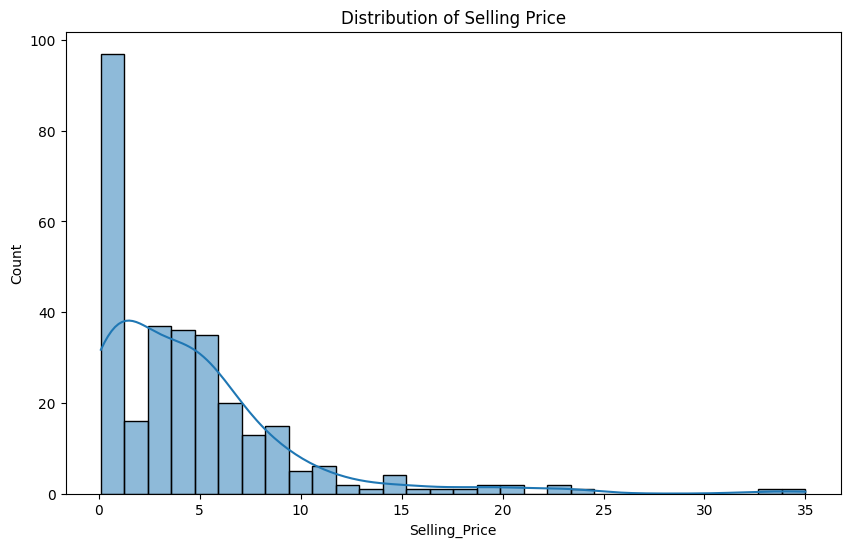

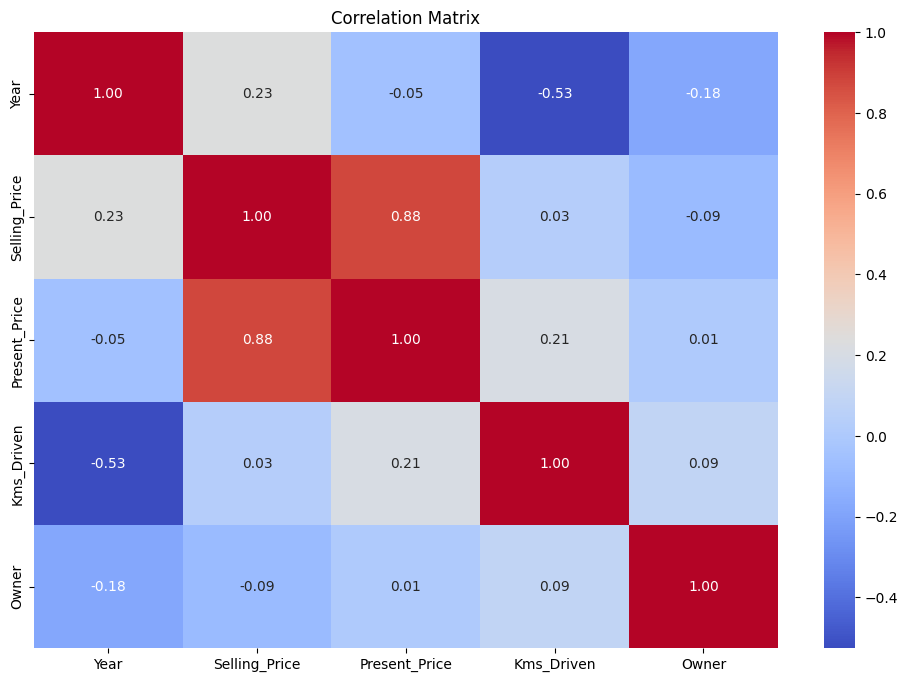

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of selling price
plt.figure(figsize=(10,6))
sns.histplot(data['Selling_Price'], kde=True, bins=30)
plt.title('Distribution of Selling Price')
plt.show()

# Visualize correlation matrix to understand feature relationships
plt.figure(figsize=(12,8))
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [32]:
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model using MAE, MSE, and R2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 1.4139931739114098
Mean Squared Error: 5.938718957798406
R-squared: 0.7695782975940887


In [47]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Ridge Regression
ridge_model = Ridge(alpha=10)  # Alpha is the regularization strength
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)  # Alpha is the regularization strength
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate Ridge and Lasso
print(f'Ridge Regression - MAE: {mean_absolute_error(y_test, y_pred_ridge)}, R2: {r2_score(y_test, y_pred_ridge)}')
print(f'Lasso Regression - MAE: {mean_absolute_error(y_test, y_pred_lasso)}, R2: {r2_score(y_test, y_pred_lasso)}')



Ridge Regression - MAE: 1.4179624923693976, R2: 0.7694746177425369
Lasso Regression - MAE: 1.426292956211594, R2: 0.7697473536755126


In [43]:
# Cross-validation for Linear Regression
linear_model = LinearRegression()


# Cross-validation for Ridge Regression
cv_scores_ridge = cross_val_score(ridge_model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
print(f'Cross-validated MAE for Ridge Regression: {-cv_scores_ridge.mean()}')

# Cross-validation for Lasso Regression
cv_scores_lasso = cross_val_score(lasso_model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
print(f'Cross-validated MAE for Lasso Regression: {-cv_scores_lasso.mean()}')


Cross-validated MAE for Ridge Regression: 1.415993362527404
Cross-validated MAE for Lasso Regression: 1.4024938052143006


In [46]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# Define hyperparameters grid for Ridge and Lasso
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Grid Search for Ridge Regression
ridge_grid = GridSearchCV(Ridge(), param_grid, cv=5)
ridge_grid.fit(X_train, y_train)
print(f'Best alpha for Ridge Regression: {ridge_grid.best_params_}')

# Grid Search for Lasso Regression
lasso_grid = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_grid.fit(X_train, y_train)
print(f'Best alpha for Lasso Regression: {lasso_grid.best_params_}')


Best alpha for Ridge Regression: {'alpha': 10}
Best alpha for Lasso Regression: {'alpha': 0.01}


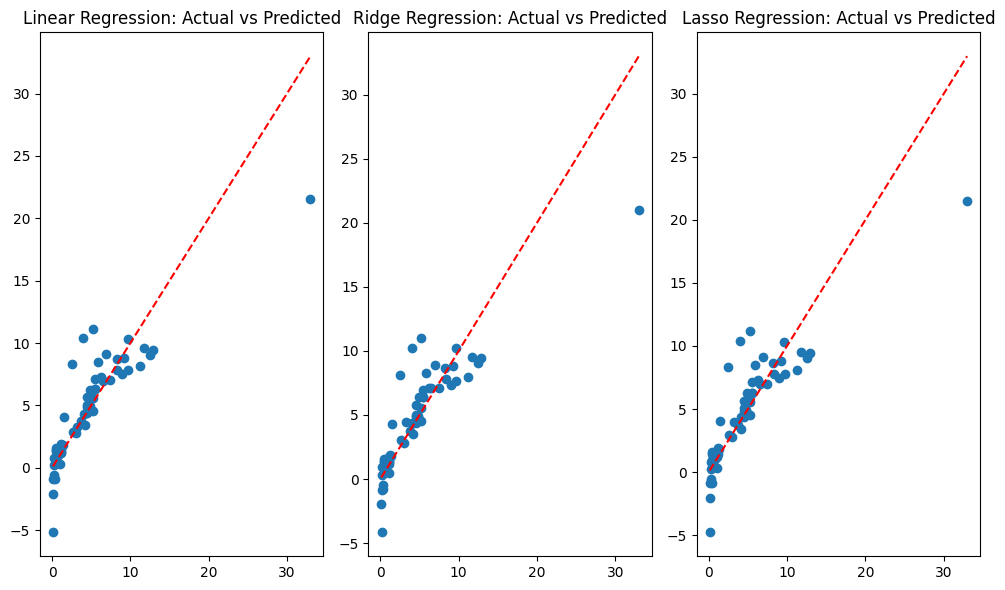

In [48]:
plt.figure(figsize=(10,6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted')

# Ridge Regression
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Ridge Regression: Actual vs Predicted')

# Lasso Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Lasso Regression: Actual vs Predicted')

plt.tight_layout()
plt.show()
